In [19]:
#Versión dos de black jack

!pip install pyglet
!pip install pygame

import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))

!pip install renderlab

!pip install swig
!pip install gymnasium[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.3/884.3 kB 10.7 MB/s eta 0:00:00
pygame 2.6.0 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2376133 sha256=f926834221bc8f92e408425dd69f1bc198c4afab513e03036112b8e154110942
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


In [20]:
#Import Libraries
import gymnasium as gym
import numpy as np
from collections import defaultdict

In [233]:
class Montecarlo_Blackjack:
  def __init__(self):
    self.env = gym.make('Blackjack-v1')
    self.policy = None
    self.gamma = 0.9
    self.action_value = defaultdict(lambda: np.zeros(self.env.action_space.n))
    self.epsilon = 0.1
    self.Q=defaultdict(float)
    self.N=defaultdict(float)
    self.G=0.0
    self.rewards_memory=collections.deque([])
    self.returns_memory=defaultdict(list)
    self.observations_action_memory=collections.deque([])
    self.posible_actions=np.array([i for i in range(self.env.action_space.n)])
    self.comulative_rewar=defaultdict(float)
    self.victory_count=0
    self.lose_count=0
    self.draw_count=0
    self.mode="epsilon_greedy"

  def reset(self):
    self.policy = None
    self.gamma = 0.9
    self.action_value = defaultdict(lambda: np.zeros(self.env.action_space.n))
    self.epsilon = 0.1
    self.Q=defaultdict(float)
    self.N=defaultdict(float)
    self.G=0.0
    self.rewards_memory=collections.deque([])
    self.returns_memory=defaultdict(list)
    self.observations_action_memory=collections.deque([])
    self.posible_actions=np.array([i for i in range(self.env.action_space.n)])
    self.comulative_rewar=defaultdict(float)
    self.victory_count=0
    self.lose_count=0
    self.draw_count=0
    self.mode="epsilon_greedy"

  def epsilon_greedy(self,observation):
    if self.policy is None:
      return self.env.action_space.sample()
    if np.random.random() < self.epsilon:
      return self.env.action_space.sample()
    else:
      v=-999
      for i in self.posible_actions:
        fill=self.Q[tuple((observation,i))]
        if fill>v:
          v=fill
          action=i
      return action
  def absolute_greddy(self,observation):
    v=-999
    for i in self.posible_actions:
      fill=self.Q[tuple((observation,i))]
      if fill>v:
        v=fill
        action=i
    return action


  def episode_loop(self, num_episodes,vervose=0):
    episode=0
    for _ in range(num_episodes):
      observation, info=self.env.reset()
      done=False
      t=0
      while not done:
        if self.mode=="epsilon_greedy":
          action = self.epsilon_greedy(observation)
        if self.mode=="absolute_greddy":
          action = self.absolute_greddy(observation)
        t+=1
        New_observation, reward, done, truncate, info = self.env.step(action)
        self.rewards_memory.append(reward)
        self.N[tuple((observation,action))]+= 1
        self.observations_action_memory.append(tuple((observation,action)))
        if vervose==1:
          print(f"Action: {action}, Reward: {reward}, Done: {done}")
        observation=New_observation
        self.comulative_rewar[episode]+=reward
      K=len(self.rewards_memory)
      self.G=0.0
      for i in range(K):
        state_action_pairs=self.observations_action_memory.pop()
        self.G=self.G*self.gamma+self.rewards_memory.pop()
        self.returns_memory[state_action_pairs].append(self.G)
        self.Q[state_action_pairs]=mean(self.returns_memory[state_action_pairs])
      episode+=1
      if vervose==1:
        #print(f"Total reward: {sum(self.returns_memory)}")
        #print(f"Average reward: {mean(self.returns_memory)}")
        #print(f"Standard deviation: {stdev(self.returns_memory)}")
        print(f"End of episode: {episode}")
        print("____________________________")
      self.policy_optimization()


  def policy_optimization(self):
    self.policy=True

  def evaluate_policy(self,games=1):
    for _ in range(games):
      observation, info=self.env.reset()
      done=False
      while not done:
        if self.mode=="epsilon_greedy":
          action = self.epsilon_greedy(observation)
        if self.mode=="absolute_greddy":
          action = self.absolute_greddy(observation)
        observation, reward, done, truncate, info = self.env.step(action)
        if done:
          if reward==1:
            self.victory_count+=1
          if reward==-1:
            self.lose_count+=1
          if reward==0:
            self.draw_count+=1





In [234]:
Blackjack=Montecarlo_Blackjack()

y=[]
for i in [10,20,1000,10000,20000,100000,200000,500000]:
  Blackjack.episode_loop(i,vervose=0)
  Blackjack.mode="absolute_greddy"
  Blackjack.evaluate_policy(games=100000)
  print("--------------------------------")
  print(f"Para {i} ciclos de entrenamiento tenemos")
  print(f"Victories: {Blackjack.victory_count}")
  print(f"Loses: {Blackjack.lose_count}")
  print(f"Draws: {Blackjack.draw_count}")
  print(f"El porcentaje de victoria/derrota es: {Blackjack.victory_count/Blackjack.lose_count} ")
  print(f"El porcentaje de victoria/Numero de juegos es: {Blackjack.victory_count/(Blackjack.lose_count+Blackjack.victory_count+Blackjack.draw_count)} ")
  print(f"El porcentaje de derrotas/Numero de juegos es: {Blackjack.lose_count/(Blackjack.lose_count+Blackjack.victory_count+Blackjack.draw_count)} ")
  print("_______________________________")
  Blackjack.reset()



--------------------------------
Para 10 ciclos de entrenamiento tenemos
Victories: 39279
Loses: 55450
Draws: 5271
El porcentaje de victoria/derrota es: 0.7083678990081154 
El porcentaje de victoria/Numero de juegos es: 0.39279 
El porcentaje de derrotas/Numero de juegos es: 0.5545 
_______________________________
--------------------------------
Para 20 ciclos de entrenamiento tenemos
Victories: 38901
Loses: 55434
Draws: 5665
El porcentaje de victoria/derrota es: 0.7017534365191038 
El porcentaje de victoria/Numero de juegos es: 0.38901 
El porcentaje de derrotas/Numero de juegos es: 0.55434 
_______________________________
--------------------------------
Para 1000 ciclos de entrenamiento tenemos
Victories: 40383
Loses: 53142
Draws: 6475
El porcentaje de victoria/derrota es: 0.7599074178615784 
El porcentaje de victoria/Numero de juegos es: 0.40383 
El porcentaje de derrotas/Numero de juegos es: 0.53142 
_______________________________
--------------------------------
Para 10000 cicl

In [235]:
Blackjack=Montecarlo_Blackjack()

y=[]
#With incremental learning
for i in [10,20,1000,10000,20000,100000,200000,500000]:
  Blackjack.episode_loop(i,vervose=0)
  Q=Blackjack.Q
  Blackjack.mode="absolute_greddy"
  Blackjack.evaluate_policy(games=100000)
  print("--------------------------------")
  print(f"Para {i} ciclos de entrenamiento tenemos")
  print(f"Victories: {Blackjack.victory_count}")
  print(f"Loses: {Blackjack.lose_count}")
  print(f"Draws: {Blackjack.draw_count}")
  print(f"El porcentaje de victoria/derrota es: {Blackjack.victory_count/Blackjack.lose_count} ")
  print(f"El porcentaje de victoria/Numero de juegos es: {Blackjack.victory_count/(Blackjack.lose_count+Blackjack.victory_count+Blackjack.draw_count)} ")
  print(f"El porcentaje de derrotas/Numero de juegos es: {Blackjack.lose_count/(Blackjack.lose_count+Blackjack.victory_count+Blackjack.draw_count)} ")
  print("_______________________________")
  Blackjack.reset()
  Blackjack.Q=Q



--------------------------------
Para 10 ciclos de entrenamiento tenemos
Victories: 37660
Loses: 57175
Draws: 5165
El porcentaje de victoria/derrota es: 0.6586794927853082 
El porcentaje de victoria/Numero de juegos es: 0.3766 
El porcentaje de derrotas/Numero de juegos es: 0.57175 
_______________________________
--------------------------------
Para 20 ciclos de entrenamiento tenemos
Victories: 38374
Loses: 55657
Draws: 5969
El porcentaje de victoria/derrota es: 0.6894730222613508 
El porcentaje de victoria/Numero de juegos es: 0.38374 
El porcentaje de derrotas/Numero de juegos es: 0.55657 
_______________________________
--------------------------------
Para 1000 ciclos de entrenamiento tenemos
Victories: 40267
Loses: 52159
Draws: 7574
El porcentaje de victoria/derrota es: 0.7720048313809698 
El porcentaje de victoria/Numero de juegos es: 0.40267 
El porcentaje de derrotas/Numero de juegos es: 0.52159 
_______________________________
--------------------------------
Para 10000 cicl

In [ ]:
Blackjack.Q

In [237]:
# Supongamos que tienes un defaultdict con datos
datos = Q

# Especificar el nombre del archivo donde se guardarán los datos
nombre_archivo = 'datos.txt'

# Abrir el archivo en modo escritura
with open(nombre_archivo, 'w') as archivo:
    # Recorrer el defaultdict y escribir cada par clave-valor en una línea
    for clave, valor in datos.items():
        archivo.write(f'{clave}: {valor}\n')

print(f'Datos guardados en {nombre_archivo}')






Datos guardados en datos.txt


In [259]:
# Crear un defaultdict vacío
Q= defaultdict(float)

# Abrir el archivo en modo lectura
with open('datos.txt', 'r') as file:
    # Leer cada línea del archivo
    for line in file:
        # Separar la clave y el valor usando el separador ": "
        key, value = line.strip().split(': ')
        # Convertir la clave a int y el valor a float, luego almacenarlos en el defaultdict
        Q[key] = float(value)

# Verificar los datos cargados
print("Datos cargados:", datos_cargados)

Datos cargados: defaultdict(<class 'float'>, {'((16, 10, 0), 0)': -0.5866402490801019, '((12, 10, 0), 1)': -0.4260440832483656, '((21, 10, 1), 1)': -0.013500000000000002, '((17, 10, 0), 0)': -0.45148995148995147, '((17, 10, 0), 1)': -0.6506289978678038, '((18, 10, 0), 0)': -0.2511970313622217, '((18, 10, 0), 1)': -0.6840595111583422, '((11, 3, 0), 0)': -0.30357142857142855, '((11, 3, 0), 1)': 0.20176567164179104, '((20, 10, 0), 0)': 0.43165206337676487, '((20, 10, 0), 1)': -0.861904761904762, '((14, 10, 0), 1)': -0.5103796076615936, '((12, 10, 0), 0)': -0.613958560523446, '((13, 10, 0), 0)': -0.5889872173058014, '((13, 1, 0), 0)': -0.8036363636363636, '((13, 1, 0), 1)': -0.5523244926199262, '((9, 1, 0), 0)': -0.8095238095238095, '((9, 1, 0), 1)': -0.3077133219412167, '((14, 9, 0), 0)': -0.5635179153094463, '((14, 9, 0), 1)': -0.4557343601895735, '((19, 10, 0), 0)': -0.010624705803241208, '((19, 10, 0), 1)': -0.7825814536340852, '((16, 7, 0), 0)': -0.48148148148148145, '((16, 7, 0), 1)'

In [305]:
#This is taken from : https://www.kaggle.com/code/angps95/blackjack-strategy-using-reinforcement-learning/notebook


from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
def plot_policy(policy):

    def get_Z(player_hand, dealer_showing, usable_ace):
        if (player_hand, dealer_showing, usable_ace) in policy:
            return policy[player_hand, dealer_showing, usable_ace]
        else:
            return 1

    def get_figure(usable_ace, ax):
        x_range = np.arange(1, 11)
        y_range = np.arange(11, 22)
        X, Y = np.meshgrid(x_range, y_range)
        Z = np.array([[get_Z(player_hand, dealer_showing, usable_ace) for dealer_showing in x_range] for player_hand in range(21, 10, -1)])
        surf = ax.imshow(Z, cmap=plt.get_cmap('Accent', 2), vmin=0, vmax=1, extent=[0.5, 10.5, 10.5, 21.5])
        plt.xticks(x_range, ('A', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
        plt.yticks(y_range)
        ax.set_xlabel('Dealer Showing')
        ax.set_ylabel('Player Hand')
        ax.grid(color='black', linestyle='-', linewidth=1)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        cbar = plt.colorbar(surf, ticks=[0, 1], cax=cax)
        cbar.ax.set_yticklabels(['0 (STICK)','1 (HIT)'])
        cbar.ax.invert_yaxis()

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(121)
    ax.set_title('Usable Ace', fontsize=16)
    get_figure(True, ax)
    ax = fig.add_subplot(122)
    ax.set_title('No Usable Ace', fontsize=16)
    get_figure(False, ax)
    plt.show()

On-Policy MC Learning Policy


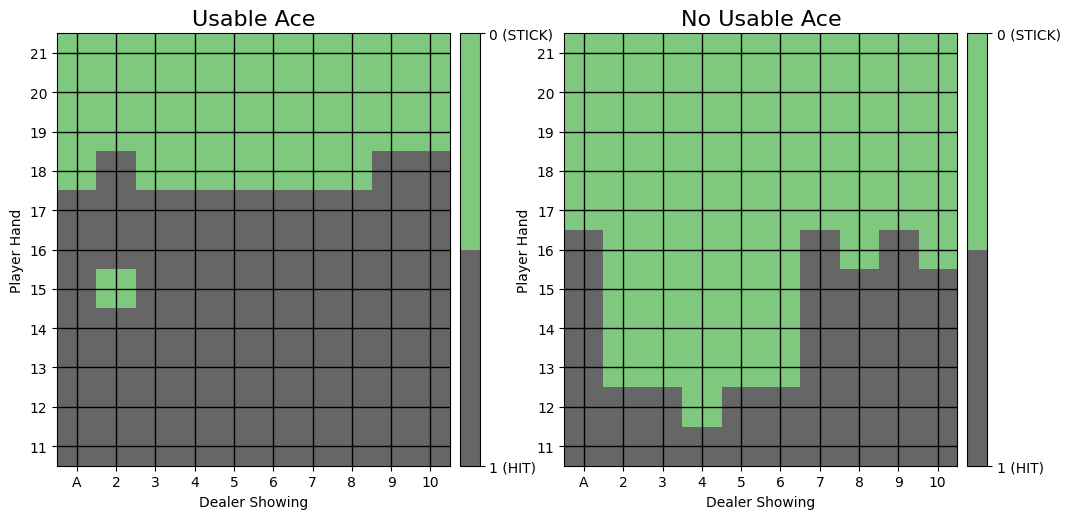

In [304]:
Q_store =defaultdict(lambda: np.zeros(Blackjack.env.action_space.n)) #defaultdict(lambda: np.zeros(Blackjack.env.action_space.n))
for i in Q.keys():
  tupla=eval(i)
  Q_store[tupla[0]][tupla[1]]=Q[i]
  #Q_store[i[0]]=0
  #np.argmax(Q[i[0][0]],Q[i[0][1]])

Q_on_pol=Q_store
on_pol = {key: np.argmax(Q_on_pol[key]) for key in Q_on_pol.keys()}
print("On-Policy MC Learning Policy")
plot_policy(on_pol)

In [302]:
on_pol



{(16, 10, 0): 0,
 (12, 10, 0): 1,
 (21, 10, 1): 0,
 (17, 10, 0): 0,
 (18, 10, 0): 0,
 (11, 3, 0): 1,
 (20, 10, 0): 0,
 (14, 10, 0): 1,
 (13, 10, 0): 1,
 (13, 1, 0): 1,
 (9, 1, 0): 1,
 (14, 9, 0): 1,
 (19, 10, 0): 0,
 (16, 7, 0): 1,
 (14, 6, 1): 1,
 (13, 8, 0): 1,
 (12, 5, 0): 1,
 (20, 6, 1): 0,
 (17, 3, 0): 0,
 (20, 3, 0): 0,
 (12, 7, 0): 1,
 (12, 2, 0): 1,
 (20, 1, 0): 0,
 (10, 9, 0): 1,
 (12, 10, 1): 1,
 (15, 10, 0): 1,
 (13, 7, 0): 1,
 (14, 6, 0): 0,
 (15, 8, 0): 1,
 (13, 7, 1): 1,
 (18, 1, 0): 0,
 (12, 9, 0): 1,
 (13, 4, 0): 0,
 (21, 7, 1): 0,
 (7, 10, 0): 1,
 (15, 2, 0): 0,
 (21, 10, 0): 0,
 (20, 5, 0): 0,
 (14, 3, 0): 0,
 (16, 6, 0): 0,
 (20, 7, 0): 0,
 (17, 1, 0): 0,
 (14, 2, 0): 0,
 (12, 4, 0): 0,
 (16, 9, 0): 1,
 (17, 6, 0): 0,
 (8, 6, 0): 1,
 (16, 1, 0): 1,
 (17, 4, 0): 0,
 (15, 6, 0): 0,
 (5, 4, 0): 1,
 (14, 8, 0): 1,
 (4, 3, 0): 1,
 (21, 9, 1): 0,
 (11, 10, 0): 1,
 (10, 10, 0): 1,
 (9, 8, 0): 1,
 (11, 7, 0): 1,
 (13, 3, 0): 0,
 (9, 7, 0): 1,
 (18, 4, 0): 0,
 (21, 4, 1): 0,


1

[45, 4950, 499500, 49995000]